In [1]:
# Fashion MNIST Classification using Artificial Neural Networks (ANN)

# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# Normalize the data (scaling pixel values to the range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the data (28x28 images to 784-dimensional vectors)
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [4]:
# Build a simple ANN model with sigmoid activation
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  # Output layer with 10 neurons (for 10 classes)
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 5 epochs
model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5


1875/1875 [==============================] - 25s 11ms/step - loss: 0.5997 - accuracy: 0.7988
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4603 - accuracy: 0.8421
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4360 - accuracy: 0.8497
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4218 - accuracy: 0.8546
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4131 - accuracy: 0.8575


In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 [==============================] - 10s 11ms/step - loss: 0.4517 - accuracy: 0.8435
Test Accuracy: 84.35%


In [7]:
# Make predictions on the test set
y_predicted = model.predict(x_test_flattened)

# Convert predicted probabilities to class labels
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Display the first few predictions alongside actual labels
print(f"Predicted labels: {y_predicted_labels[:12]}")
print(f"Actual labels: {y_test[:12]}")

313/313 [==============================] - 3s 8ms/step
Predicted labels: [9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5]
Actual labels: [9 2 1 1 6 1 4 6 5 7 4 5]


In [8]:
# Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

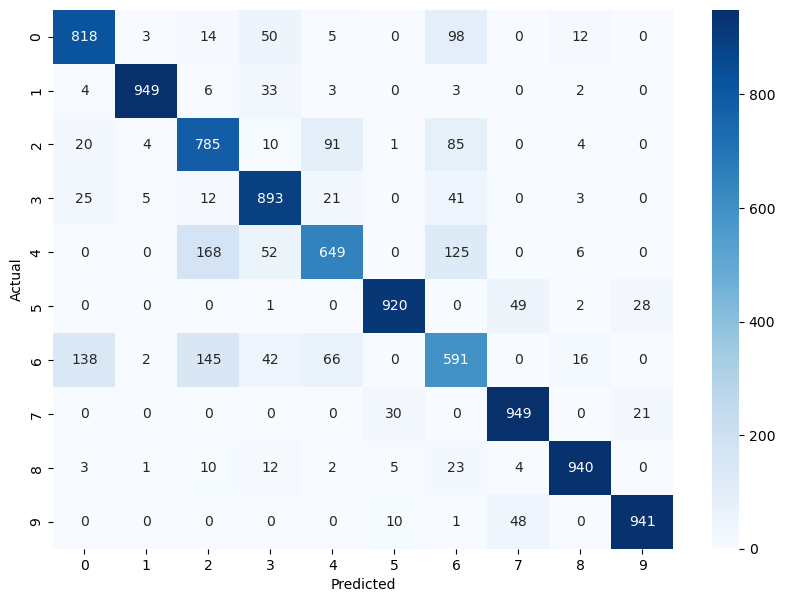

In [9]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.69      0.79      0.73      1000
           3       0.82      0.89      0.85      1000
           4       0.78      0.65      0.71      1000
           5       0.95      0.92      0.94      1000
           6       0.61      0.59      0.60      1000
           7       0.90      0.95      0.93      1000
           8       0.95      0.94      0.95      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [11]:
# Build a deeper ANN model with multiple layers and sigmoid activation
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),  # First hidden layer
    keras.layers.Dense(200, activation='sigmoid'),                      # Second hidden layer
    keras.layers.Dense(10, activation='softmax')                        # Output layer with softmax activation
])

# Compile the deeper model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the deeper model for 10 epochs
model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 18ms/step - loss: 0.5924 - accuracy: 0.7907
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3900 - accuracy: 0.8590
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3529 - accuracy: 0.8720
Epoch 4/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3289 - accuracy: 0.8792
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3116 - accuracy: 0.8858
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2963 - accuracy: 0.8911
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2845 - accuracy: 0.8956
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2726 - accuracy: 0.8980
Epoch 9/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2620 - accuracy: 0.9028
Epoch 10/10
1875/1875 [==============================] - 21s 11ms

In [12]:
# Evaluate the deeper model
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)
print(f"Test Accuracy (Deeper Model): {test_accuracy * 100:.2f}%")

313/313 [==============================] - 4s 9ms/step - loss: 0.3329 - accuracy: 0.8818
Test Accuracy (Deeper Model): 88.18%


In [13]:
# Make predictions with the deeper model
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 3s 8ms/step


In [14]:
# Confusion matrix for deeper model
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

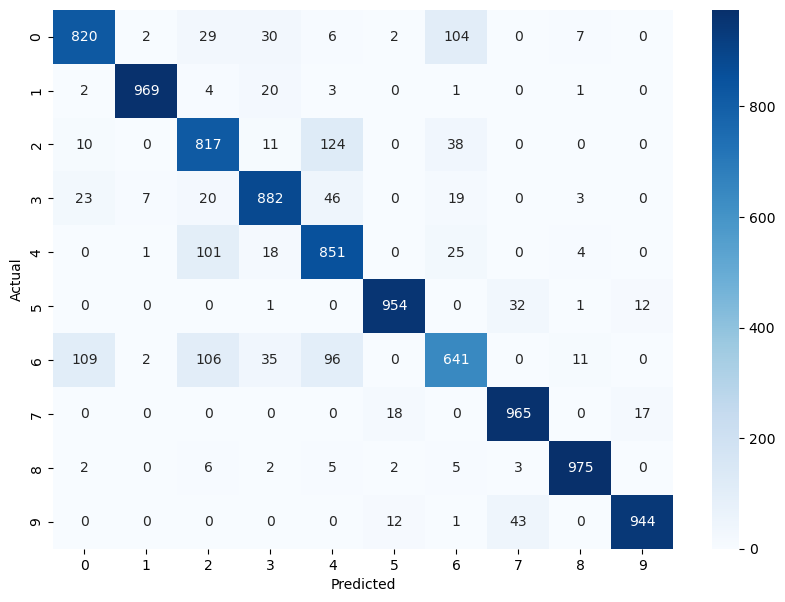

In [15]:
# Plot confusion matrix for deeper model
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Print classification report for deeper model
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.82      0.78      1000
           3       0.88      0.88      0.88      1000
           4       0.75      0.85      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.77      0.64      0.70      1000
           7       0.93      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

